# Import Dataset & Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.ticker as mtick

In [11]:
dataset = pd.read_csv("supplement_sales_forecast.csv")
names = ['id', 'store_id', 'store_type', 'location_type', 'region_code', 'date', 'holiday', 'discount', 'order', 'sales']
dataset.columns = names
dataset.head()

,id,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             188340 non-null  object 
 1   store_id       188340 non-null  int64  
 2   store_type     188340 non-null  object 
 3   location_type  188340 non-null  object 
 4   region_code    188340 non-null  object 
 5   date           188340 non-null  object 
 6   holiday        188340 non-null  int64  
 7   discount       188340 non-null  object 
 8   order          188340 non-null  int64  
 9   sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


# Exploratory Data Analysis

In [13]:
categorical_cols = ['store_id', 'store_type', 'location_type', 'region_code', 'holiday','discount']
numerical_cols = ['order', 'sales']

In [14]:
# Casting to category type
for col in dataset.columns:
    if col in categorical_cols:
        dataset[col] = dataset[col].astype('category')

# Casting to datetime type
dataset['date'] = pd.to_datetime(dataset['date'])

# Convert holiday's values to 'Yes' and 'No'
dataset['holiday'] = dataset['holiday'].map({1: 'Yes', 0: 'No'})

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             188340 non-null  object        
 1   store_id       188340 non-null  category      
 2   store_type     188340 non-null  category      
 3   location_type  188340 non-null  category      
 4   region_code    188340 non-null  category      
 5   date           188340 non-null  datetime64[ns]
 6   holiday        188340 non-null  category      
 7   discount       188340 non-null  category      
 8   order          188340 non-null  int64         
 9   sales          188340 non-null  float64       
dtypes: category(6), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [15]:
for col in categorical_cols:
    print(f"Column: {col} -- {dataset[col].unique()}\n")

Column: store_id -- [1, 253, 252, 251, 250, ..., 359, 362, 363, 360, 364]
Length: 365
Categories (365, int64): [1, 2, 3, 4, ..., 362, 363, 364, 365]

Column: store_type -- ['S1', 'S4', 'S3', 'S2']
Categories (4, object): ['S1', 'S2', 'S3', 'S4']

Column: location_type -- ['L3', 'L2', 'L1', 'L5', 'L4']
Categories (5, object): ['L1', 'L2', 'L3', 'L4', 'L5']

Column: region_code -- ['R1', 'R4', 'R2', 'R3']
Categories (4, object): ['R1', 'R2', 'R3', 'R4']

Column: holiday -- ['Yes', 'No']
Categories (2, object): ['No', 'Yes']

Column: discount -- ['Yes', 'No']
Categories (2, object): ['No', 'Yes']



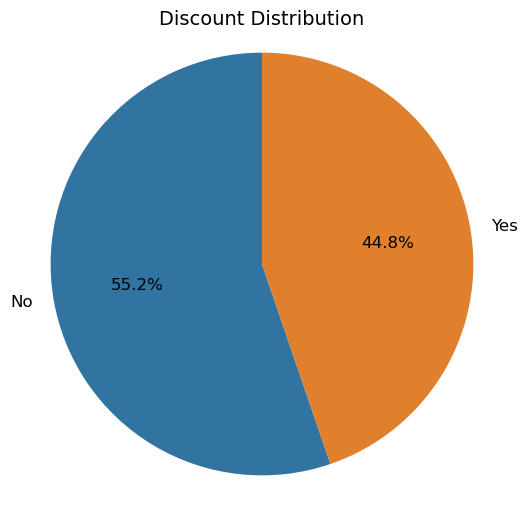

In [16]:
# Count discount values
discount_counts = dataset['discount'].value_counts()

# Labels and sizes
labels = discount_counts.index
sizes = discount_counts.values
colors = ['#3274a1', '#e0802c']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Discount Distribution', fontsize=14)
plt.axis('equal')

plt.show()

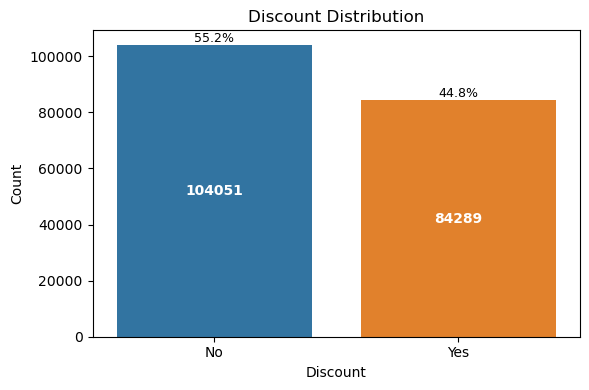

In [17]:
# Count the total number of rows
total = len(dataset)

# Create the countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="discount", data=dataset, hue="discount")
plt.title("Discount Distribution")
plt.xlabel("Discount")
plt.ylabel("Count")

# Add both count (inside) and percentage (above)
for bar in ax.patches:
    count = bar.get_height()
    bar_center = bar.get_x() + bar.get_width() / 2

    # Add count inside the bar (middle)
    ax.text(
        bar_center,
        count * 0.5,  # middle of the bar
        f'{int(count)}',
        ha='center',
        va='center',
        fontsize=10,
        color='white',
        fontweight='bold'
    )

    # Add percentage above the bar
    ax.text(
        bar_center,
        count + 2,  # slightly above
        f'{(count / total) * 100:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()

## Categorical Features

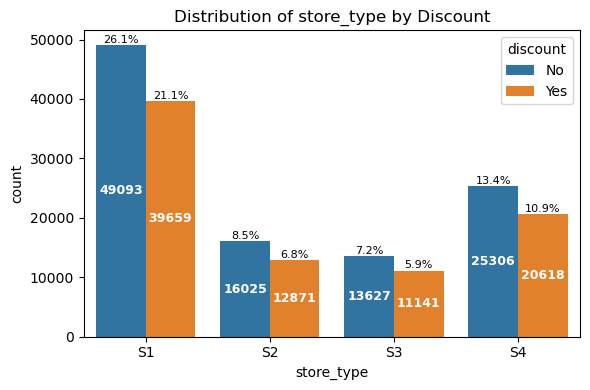

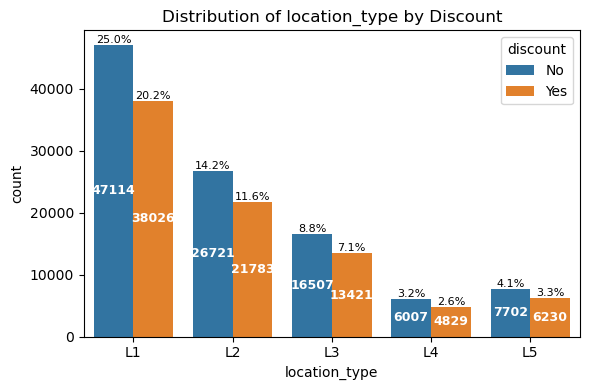

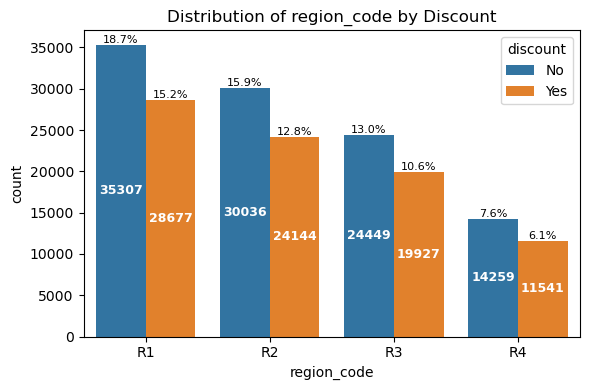

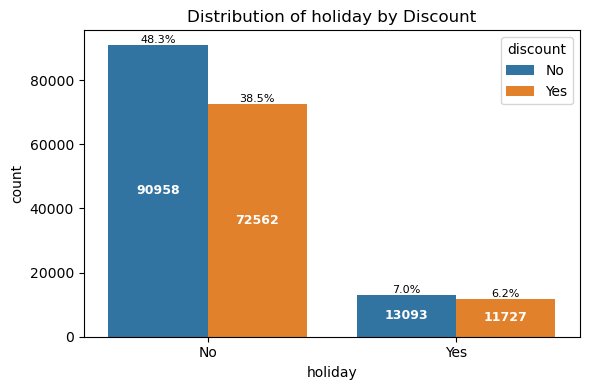

In [18]:
for col in [col for col in dataset.select_dtypes(include=['category']).columns if col != 'store_id']:
    if col != 'discount':
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='discount', data=dataset)
        plt.title(f'Distribution of {col} by Discount')

        # Get the axis
        ax = plt.gca()

        for p in ax.patches:
            height = p.get_height()
            bar_center = p.get_x() + p.get_width() / 2

            # Count inside the bar
            if height > 0:
                ax.text(bar_center, height * 0.5,  # middle of the bar
                        f'{int(height)}',
                        ha='center', va='center',
                        fontsize=9, color='white', fontweight='bold')

                # Percentage on top of the bar
                ax.text(bar_center, height + 2,
                        f'{(height / len(dataset)) * 100:.1f}%',
                        ha='center', va='bottom',
                        fontsize=8, color='black')

        plt.tight_layout()
        plt.show()

## Numerical Features

In [19]:
dataset.describe(include=np.number)

,order,sales
count,188340.000000,188340.000000
mean,68.205692,42784.327982
std,30.467415,18456.708302
min,0.000000,0.000000
25%,48.000000,30426.000000
50%,63.000000,39678.000000
75%,82.000000,51909.000000
max,371.000000,247215.000000


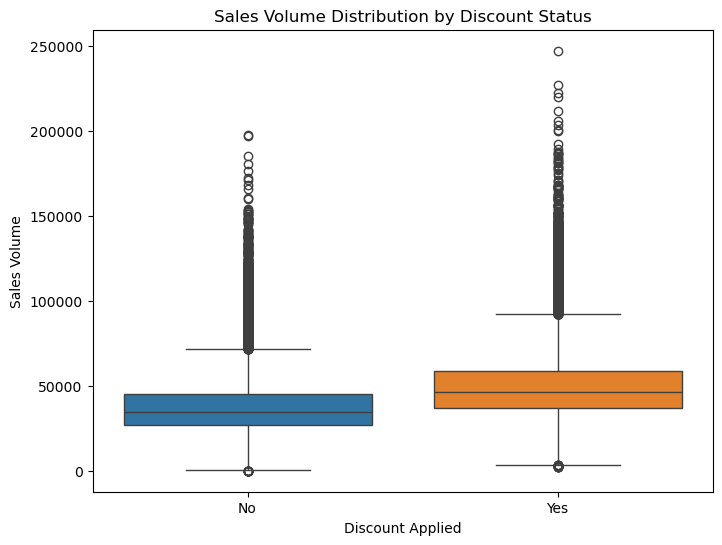

In [20]:
# Boxplot: Compare sales distribution with and without discount
plt.figure(figsize=(8, 6))
sns.boxplot(x='discount', y='sales', data=dataset, hue='discount')
plt.title('Sales Volume Distribution by Discount Status')
plt.xlabel('Discount Applied')
plt.ylabel('Sales Volume')
plt.show()

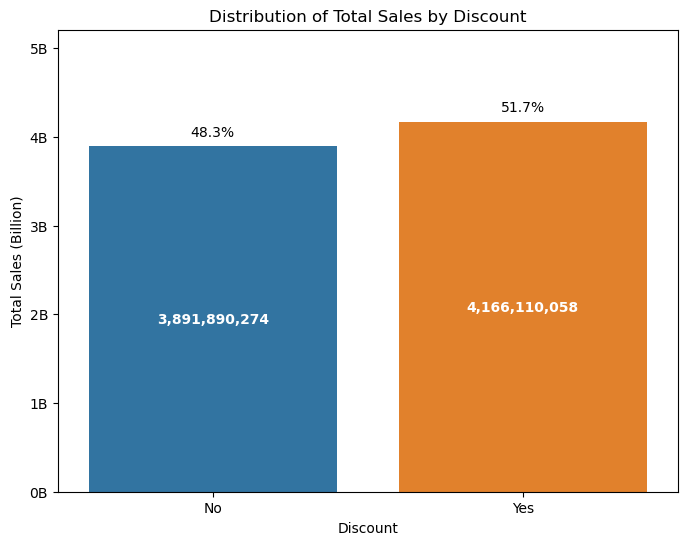

In [21]:
# Compute total sales for each discount category
group_totals = dataset.groupby('discount', observed=True)['sales'].sum().reset_index()
group_totals.columns = ['discount', 'total_sales']

# Calculate percentage of total sales
total_sales = group_totals['total_sales'].sum()
group_totals['pct_of_total'] = group_totals['total_sales'] / total_sales * 100

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='discount', y='sales', data=dataset, estimator='sum', errorbar=None, hue='discount')  # ci=None to remove vertical line

# Format y-axis to show values in millions (e.g., 10.2M)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.0f}B'))

# Annotate bars
for i, row in group_totals.iterrows():
    x = i
    y = row['total_sales']

    # Add total sales label inside bar
    ax.text(x, y * 0.5, f"{y:,.0f}", ha='center', va='center', color='white', fontweight='bold')

    # Add percentage on top of bar
    ax.text(x, y + y * 0.02, f"{row['pct_of_total']:.1f}%", ha='center', va='bottom')

# Final touches
plt.title('Distribution of Total Sales by Discount')
plt.xlabel('Discount')
plt.ylabel('Total Sales (Billion)')
plt.ylim(0, group_totals['total_sales'].max() * 1.25)  # Extra space for label 
plt.show()

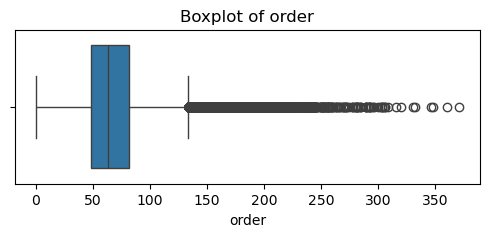

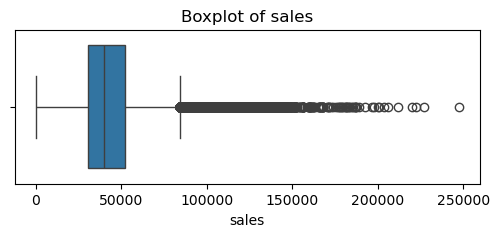

In [22]:
# Check for outliers using boxplots
for col in dataset.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(6, 2))
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

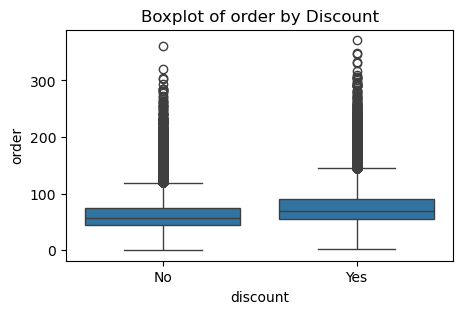

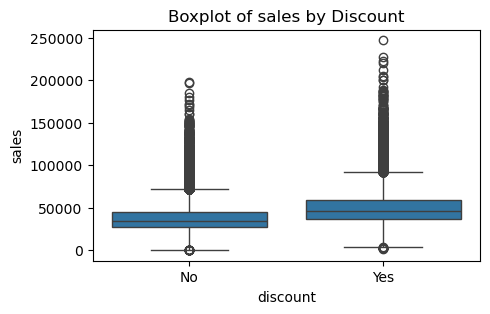

In [23]:
for col in dataset.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(5, 3))
  sns.boxplot(x='discount', y=col, data=dataset)
  plt.title(f'Boxplot of {col} by Discount')
  plt.show()

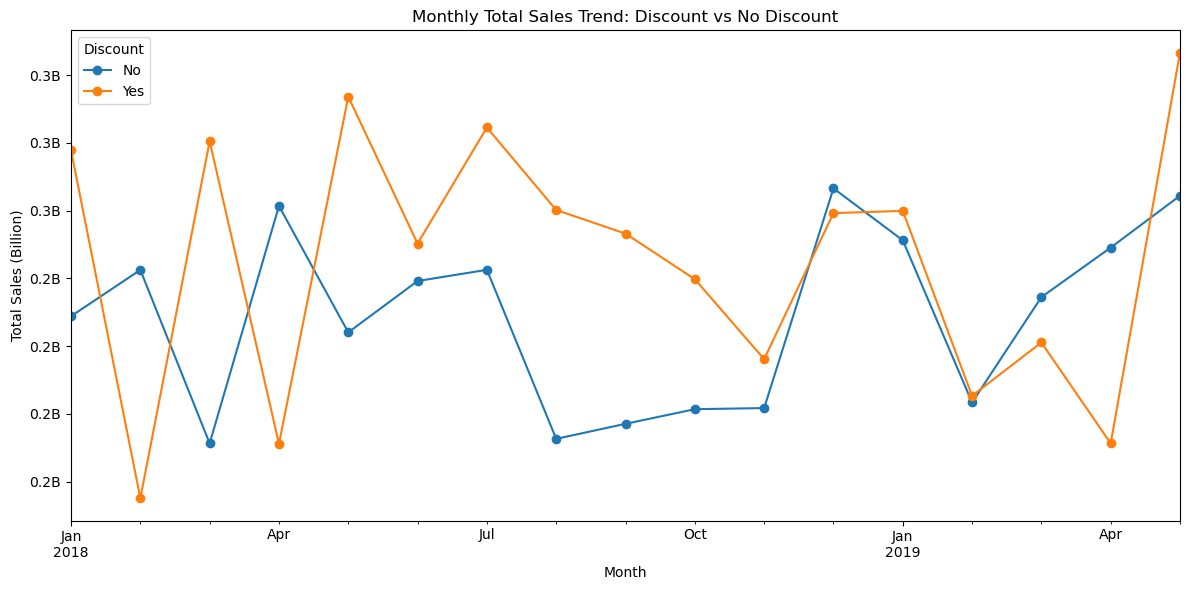

In [24]:
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month

# Create a new 'date' column representing the first day of the month
dataset['month_start'] = pd.to_datetime(dataset[['year', 'month']].assign(day=1))

# Group by year, month, and discount, then aggregate sales
monthly_sales_sum = dataset.groupby(['month_start', 'discount'], observed=True)['sales'].sum().unstack()

# Plot the data
ax = monthly_sales_sum.plot(figsize=(12, 6), marker='o')

# Format y-axis to show values in millions (e.g., 10.2M)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))

# Labels and layout
plt.title('Monthly Total Sales Trend: Discount vs No Discount')
plt.xlabel('Month')
plt.ylabel('Total Sales (Billion)')
plt.legend(title='Discount')
plt.tight_layout()
plt.show()

In [59]:
# Filter for discount == 'Yes'
filtered_data = dataset[dataset['discount'] == 'Yes']

# Filter for Q2 to Q4 of 2018
filtered_data = filtered_data[(filtered_data['month_start'] >= '2018-04-01') & (filtered_data['month_start'] <= '2018-12-31')]

# Perform groupby and sum the sales
result = filtered_data.groupby(['month_start', 'discount'], observed=True)['sales'].sum().unstack()

# Display the result
result

discount,Yes
month_start,
2018-04-01,1.911442e+08
2018-05-01,2.936732e+08
2018-06-01,2.502905e+08
2018-07-01,2.845746e+08
2018-08-01,2.602073e+08
2018-09-01,2.532390e+08
2018-10-01,2.397753e+08
2018-11-01,2.161540e+08
2018-12-01,2.592872e+08


In [62]:
filtered_data.shape

(45598, 13)

In [60]:
print(f"Total discount from Q2 to Q4: {sum(result['Yes'].values)}")

Total discount from Q2 to Q4: 2248345171.6200004


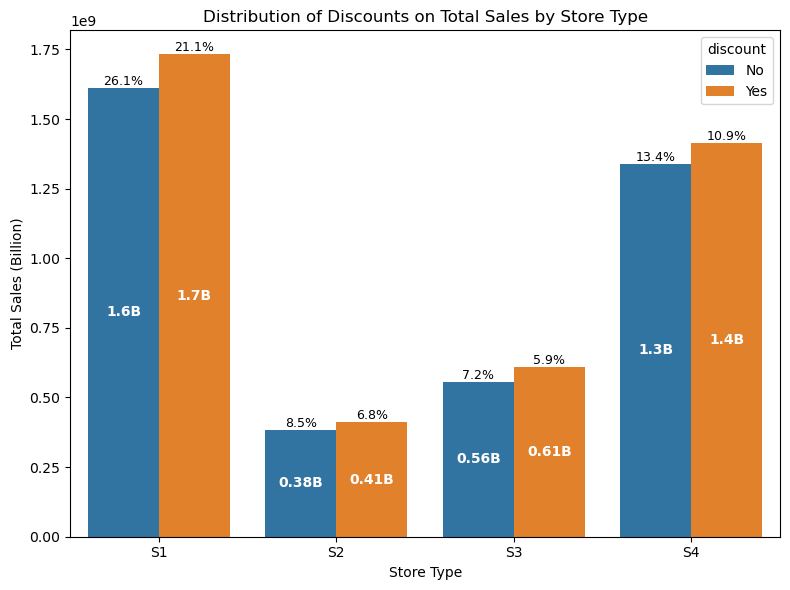

In [25]:
# Calculate average sales and count
total_sales_store = dataset.groupby(['discount', 'store_type'], observed=True)['sales'].sum().reset_index()
sales_count_store = dataset.groupby(['discount', 'store_type'], observed=True).size().reset_index(name='count')

# Merge
sales_summary_store = total_sales_store.merge(sales_count_store, on=['discount', 'store_type'])

# Calculate the overall total count
overall_total_count = sales_summary_store['count'].sum()

# Plot by store_type
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='store_type', y='sales', hue='discount', data=sales_summary_store)

# Loop through each bar in the plot
for bar in ax.patches:
    height = bar.get_height()  # height of the bar (sales value)
    x = bar.get_x() + bar.get_width() / 2  # x position of the bar (centered)

    # Loop through the data to find the corresponding sales value and count
    for _, row in sales_summary_store.iterrows():
        # Check if the row's sales match the bar height (approximate matching)
        if abs(row['sales'] - height) < 1e-2:
            # Calculate the percentage of overall count
            percent_count = (row['count'] / overall_total_count) * 100

            # Count inside bar replaced with sales in billions, formatted like '1.2B'
            ax.text(x, height * 0.5, f"{height / 1e9:.2}B",
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

            # Percentage above bar (calculated with respect to overall count)
            ax.text(x, height + 1, f"{percent_count:.1f}%",
                    ha='center', va='bottom', fontsize=9, color='black')
            break

plt.title('Distribution of Discounts on Total Sales by Store Type')
plt.ylabel('Total Sales (Billion)')
plt.xlabel('Store Type')
plt.tight_layout()
plt.show()

In [26]:
total_sales_store

,discount,store_type,sales
0,No,S1,1.611912e+09
1,No,S2,3.849424e+08
2,No,S3,5.557606e+08
3,No,S4,1.339276e+09
4,Yes,S1,1.731954e+09
5,Yes,S2,4.105884e+08
6,Yes,S3,6.098975e+08
7,Yes,S4,1.413670e+09


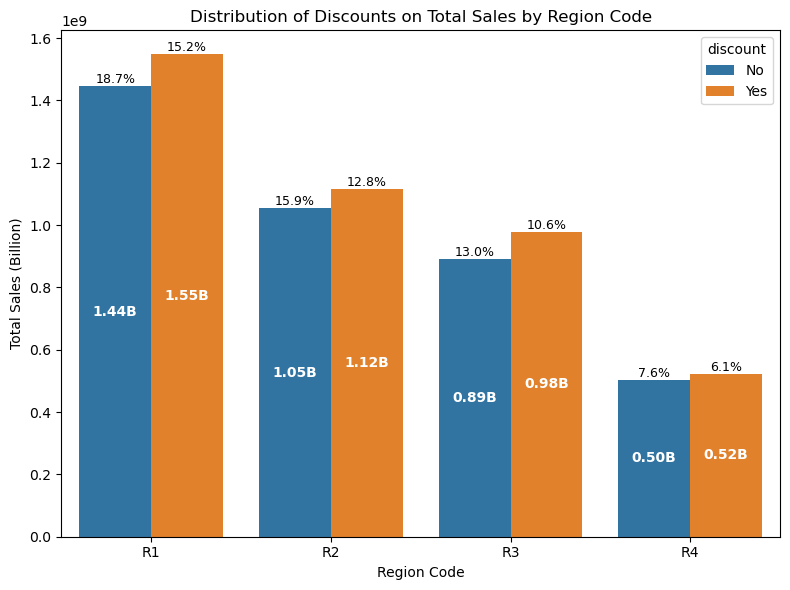

In [27]:
# By region
total_sales_reg = dataset.groupby(['discount', 'region_code'], observed=True)['sales'].sum().reset_index()
sales_count_reg = dataset.groupby(['discount', 'region_code'], observed=True).size().reset_index(name='count')
sales_summary_reg = total_sales_reg.merge(sales_count_reg, on=['discount', 'region_code'])

# Calculate the overall total count
overall_total_count = sales_summary_reg['count'].sum()

# Plot by store_type
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='region_code', y='sales', hue='discount', data=sales_summary_reg)

# Loop through each bar in the plot
for bar in ax.patches:
    height = bar.get_height()  # height of the bar (sales value)
    x = bar.get_x() + bar.get_width() / 2  # x position of the bar (centered)

    # Loop through the data to find the corresponding sales value and count
    for _, row in sales_summary_reg.iterrows():
        # Check if the row's sales match the bar height (approximate matching)
        if abs(row['sales'] - height) < 1e-2:
            # Calculate the percentage of overall count
            percent_count = (row['count'] / overall_total_count) * 100

            # Count inside bar replaced with sales in billions, formatted like '1.2B'
            ax.text(x, height * 0.5, f"{height / 1e9:.2f}B",
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

            # Percentage above bar (calculated with respect to overall count)
            ax.text(x, height + 1, f"{percent_count:.1f}%",
                    ha='center', va='bottom', fontsize=9, color='black')
            break

plt.title('Distribution of Discounts on Total Sales by Region Code')
plt.ylabel('Total Sales (Billion)')
plt.xlabel('Region Code')
plt.tight_layout()
plt.show()

In [28]:
# Dataset 2: Discount and Numerical Data
df_discount_num = dataset.select_dtypes(include=np.number)
df_discount_num['discount'] = dataset['discount']

print("\nDataset 2 (Discount and Numerical):")
print(df_discount_num.head())


Dataset 2 (Discount and Numerical):
   order     sales  year  month discount
0      9   7011.84  2018      1      Yes
1     60  51789.12  2018      1      Yes
2     42  36868.20  2018      1      Yes
3     23  19715.16  2018      1      Yes
4     62  45614.52  2018      1      Yes


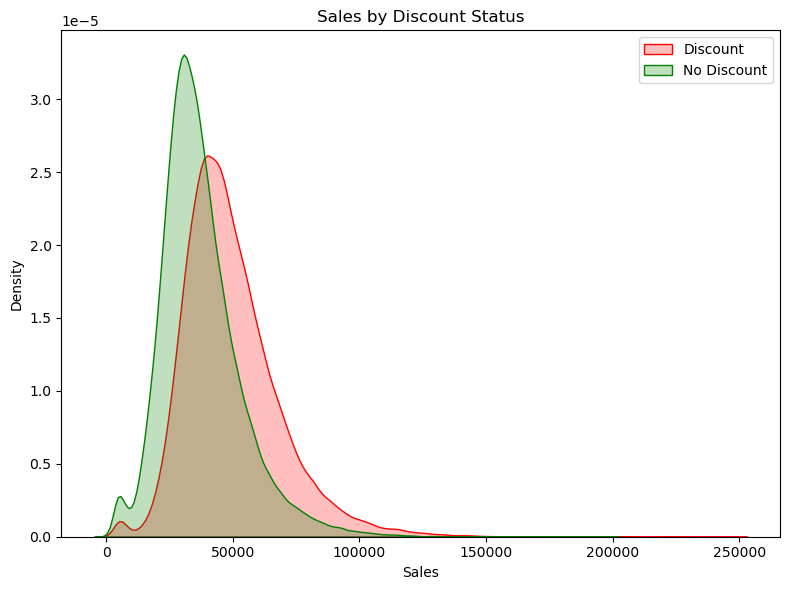

In [29]:
# density plot by Discount - Sales
plt.figure(figsize=(8, 6))

sns.kdeplot(
    data=df_discount_num[df_discount_num["discount"] == 'Yes'],
    x="sales", fill=True, color="red", label="Discount"
)

sns.kdeplot(
    data=df_discount_num[df_discount_num["discount"] == 'No'],
    x="sales", fill=True, color="green", label="No Discount"
)

plt.xlabel("Sales")
plt.ylabel("Density")
plt.title("Sales by Discount Status")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Correlation Analysis

## Numerical vs Discount

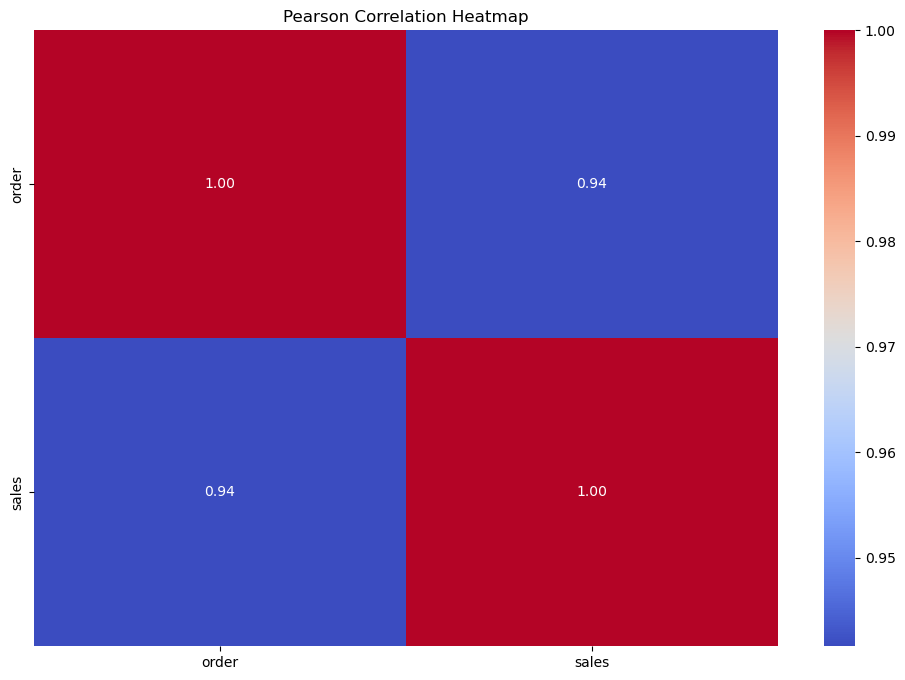

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_discount_num[['order', 'sales']].corr(method='pearson', numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

In [31]:
from scipy.stats import ttest_ind

# Separate the data into two groups based on Churn
discount_yes = df_discount_num[df_discount_num['discount'] == 'Yes']
discount_no = df_discount_num[df_discount_num['discount'] == 'No']

# Perform t-tests for each numerical feature
for column in df_discount_num.columns:
  if column != 'discount':
    t_statistic, p_value = ttest_ind(discount_yes[column], discount_no[column])
    print(f"T-test for {column}:")
    print(f"  T-statistic: {t_statistic:.2f}")
    print(f"  P-value: {p_value:.3f}")

    # Interpret the results
    if p_value < 0.05:
      print("  There is a statistically significant difference between discount and non-discount for this feature.")
    else:
      print("  There is no statistically significant difference between discount and non-discount for this feature.")
    print("---")

T-test for order:
  T-statistic: 104.16
  P-value: 0.000
  There is a statistically significant difference between discount and non-discount for this feature.
---
T-test for sales:
  T-statistic: 148.58
  P-value: 0.000
  There is a statistically significant difference between discount and non-discount for this feature.
---
T-test for year:
  T-statistic: -13.05
  P-value: 0.000
  There is a statistically significant difference between discount and non-discount for this feature.
---
T-test for month:
  T-statistic: 5.94
  P-value: 0.000
  There is a statistically significant difference between discount and non-discount for this feature.
---


## Categorical vs Churn

In [32]:
# Dataset 1: Discount and Categorical Data
df_discount_cat = dataset.select_dtypes(include=['category'])
df_discount_cat['discount'] = dataset['discount']

print("Dataset 1 (Discount and Categorical):")
print(df_discount_cat.head())

Dataset 1 (Discount and Categorical):
  store_id store_type location_type region_code holiday discount
0        1         S1            L3          R1     Yes      Yes
1      253         S4            L2          R1     Yes      Yes
2      252         S3            L2          R1     Yes      Yes
3      251         S2            L3          R1     Yes      Yes
4      250         S2            L3          R4     Yes      Yes


In [33]:
df_discount_cat = dataset[[col for col in dataset.select_dtypes(include=['category']).columns if col != 'store_id']]
df_discount_cat.head()

,store_type,location_type,region_code,holiday,discount
0,S1,L3,R1,Yes,Yes
1,S4,L2,R1,Yes,Yes
2,S3,L2,R1,Yes,Yes
3,S2,L3,R1,Yes,Yes
4,S2,L3,R4,Yes,Yes


In [34]:
for column in df_discount_cat.columns:
  # Print the column name and its unique values
  print(f"Column: {column}")
  print(df_discount_cat[column].unique())
  print("-" * 20)

Column: store_type
['S1', 'S4', 'S3', 'S2']
Categories (4, object): ['S1', 'S2', 'S3', 'S4']
--------------------
Column: location_type
['L3', 'L2', 'L1', 'L5', 'L4']
Categories (5, object): ['L1', 'L2', 'L3', 'L4', 'L5']
--------------------
Column: region_code
['R1', 'R4', 'R2', 'R3']
Categories (4, object): ['R1', 'R2', 'R3', 'R4']
--------------------
Column: holiday
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
--------------------
Column: discount
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
--------------------


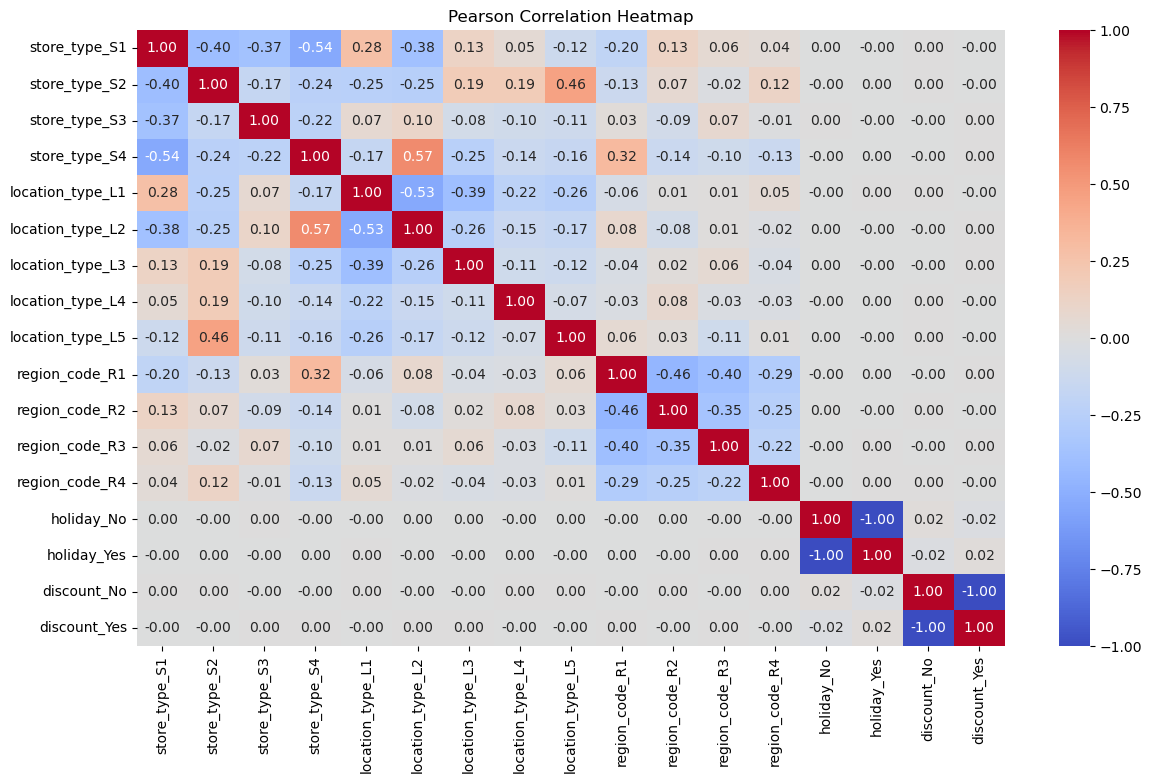

In [35]:
# Convert categorical features to numerical using one-hot encoding
df_discount_encoded = pd.get_dummies(df_discount_cat, drop_first=False)

# Calculate correlation matrix
correlation_matrix = df_discount_encoded.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(df_discount_encoded.corr(method='pearson'), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [36]:
# Calculate correlation matrix
correlation_matrix = df_discount_encoded.corr()

# Perform chi-square test for each categorical feature against Churn
from scipy.stats import chi2_contingency

for column in df_discount_encoded.columns:
  if 'discount' not in column:
    contingency_table = pd.crosstab(df_discount_encoded[column], dataset['discount'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test for {column}:")
    print(f"  Chi-square statistic: {chi2:.2f}")
    print(f"  P-value: {p_value:.3f}")

    # Interpret the results
    if p_value < 0.05:
      print("  There is a statistically significant association between this feature and discount.")
    else:
      print("  There is no statistically significant association between this feature and discount.")
    print("---")

Chi-square test for store_type_S1:
  Chi-square statistic: 0.31
  P-value: 0.576
  There is no statistically significant association between this feature and discount.
---
Chi-square test for store_type_S2:
  Chi-square statistic: 0.61
  P-value: 0.437
  There is no statistically significant association between this feature and discount.
---
Chi-square test for store_type_S3:
  Chi-square statistic: 0.59
  P-value: 0.443
  There is no statistically significant association between this feature and discount.
---
Chi-square test for store_type_S4:
  Chi-square statistic: 0.49
  P-value: 0.484
  There is no statistically significant association between this feature and discount.
---
Chi-square test for location_type_L1:
  Chi-square statistic: 0.51
  P-value: 0.475
  There is no statistically significant association between this feature and discount.
---
Chi-square test for location_type_L2:
  Chi-square statistic: 0.64
  P-value: 0.426
  There is no statistically significant association b

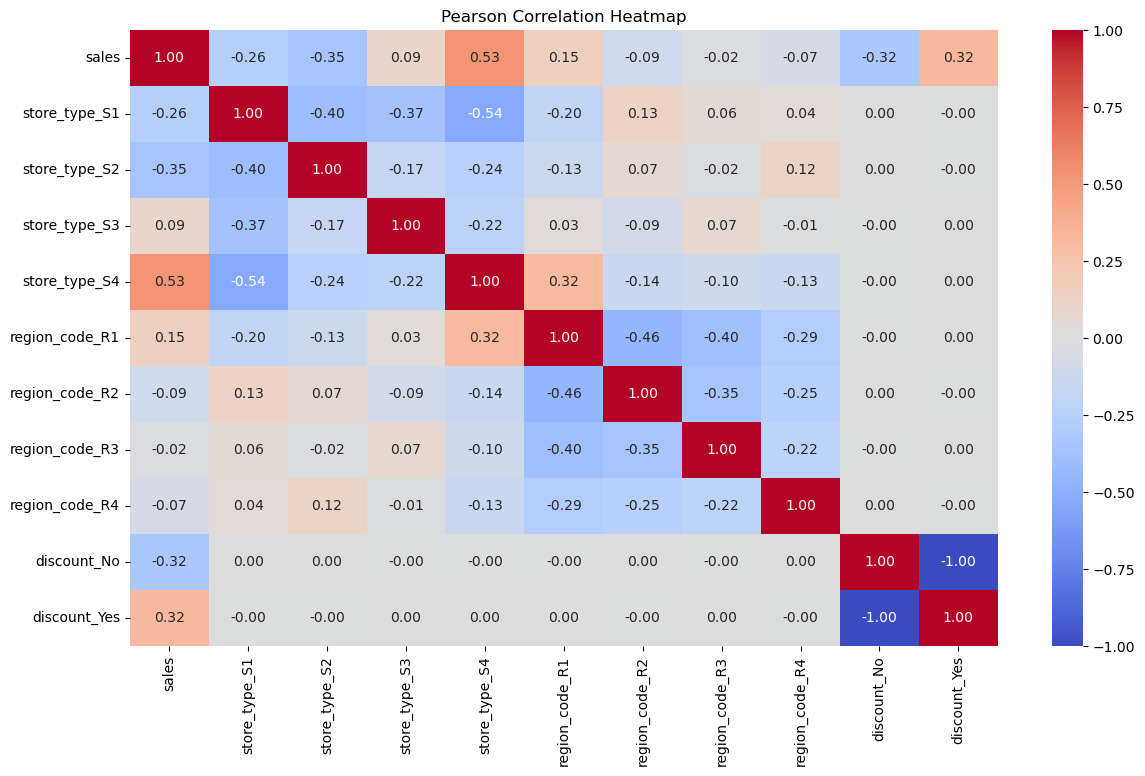

In [37]:
selected_columns = [col for col in df_discount_encoded.columns if any(key in col for key in ['store_type', 'region_code', 'discount'])]

# merge sales to the categorical columns
df_corr_merge = pd.concat([
    df_discount_num['sales'],
    df_discount_encoded[selected_columns]
], axis=1)

# Calculate correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(df_corr_merge.corr(method='pearson'), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [38]:
# Calculate correlation matrix
correlation_matrix = df_corr_merge.corr()

# Perform chi-square test for each categorical feature against Churn
from scipy.stats import chi2_contingency

for column in df_corr_merge.columns:
  if 'discount' not in column:
    contingency_table = pd.crosstab(df_corr_merge[column], dataset['discount'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test for {column}:")
    print(f"  Chi-square statistic: {chi2:.2f}")
    print(f"  P-value: {p_value:.3f}")

    # Interpret the results
    if p_value < 0.05:
      print("  There is a statistically significant association between this feature and discount.")
    else:
      print("  There is no statistically significant association between this feature and discount.")
    print("---")

Chi-square test for sales:
  Chi-square statistic: 66629.00
  P-value: 0.000
  There is a statistically significant association between this feature and discount.
---
Chi-square test for store_type_S1:
  Chi-square statistic: 0.31
  P-value: 0.576
  There is no statistically significant association between this feature and discount.
---
Chi-square test for store_type_S2:
  Chi-square statistic: 0.61
  P-value: 0.437
  There is no statistically significant association between this feature and discount.
---
Chi-square test for store_type_S3:
  Chi-square statistic: 0.59
  P-value: 0.443
  There is no statistically significant association between this feature and discount.
---
Chi-square test for store_type_S4:
  Chi-square statistic: 0.49
  P-value: 0.484
  There is no statistically significant association between this feature and discount.
---
Chi-square test for region_code_R1:
  Chi-square statistic: 0.16
  P-value: 0.686
  There is no statistically significant association between thi

# Recommendations

## Summary

* **44.8% of transactions** involved discounts (84,289 out of 188,340), driving **51.7% of total revenue**.
* **Store Type S4** exhibits the strongest positive correlation with sales, significantly outperforming other store types.
* **Discounted transactions** are positively correlated with sales, contributing more revenue per transaction, while **non-discounted transactions**, although more frequent, generate less revenue.
* From **mid-Q2 to year-end**, discounted transactions dominate, revealing a **seasonal sales pattern** where discounts become a more prominent driver of revenue. **2.2 billion in discounted deals** surpassed **non-discounted deals** from Q2 to Q4.
* **Store Types S1 and S2** are negatively correlated with sales, suggesting underperformance in comparison to other store types.
* Across all regions, the pattern holds: discounted sales are fewer but generate significantly higher revenue, with **R1 region** leading with **2.9 billion in revenue**, and **R4** trailing at **1.2 billion**.
* **S1 & S2 store types** together account for the majority of sales revenue, generating a total of **6 billion**, with **3.1 billion** from discounted transactions and **2.9 billion** from non-discounted transactions.

## Recommendations

- Prioritize and expand Store Type S4 operations during high-demand seasons (Q3–Q4) to capitalize on strong sales performance.
- Enhance discount strategies, particularly in Store Type S4, to maximize revenue from high-value purchases.
- Re-evaluate underperforming store types (S1 & S2)—adjust product mix, layout, or promotional efforts to boost sales.
- Launch targeted seasonal campaigns with threshold-based discounts to drive higher transaction values during mid-to-late year.
- Reduce or minimize discounting in Q1–early Q2 to protect profit margins when discount impact is lower.
- Segment promotions by store type and region, using performance data and correlation insights for smarter targeting.
- Tailor pricing strategies based on discount effectiveness and store type profitability.